## ESERCIZIO 2

La prima cosa da fare è importare le librerie necessarie per svolgere l'analisi

In [1]:
# Readr la utilizzerò per leggere il csv di input
require(readr)
# Libreria abbastanza pratica per la manipolazione dei dati
require(dplyr)
# Queste ultime serviranno per la data visualization
require(ggplot2)
require(ggpubr)

Loading required package: readr
Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: ggplot2
Loading required package: ggpubr
Loading required package: magrittr


Ho scelto la funzione **read_delim** della libreria *ReadR* perchè è la più flessibile. Nulla mi vieta di utilizzare un'altra funzione tipo **read_csv**.
Il primo argomento contiene il percorso del file che vogliamo importare (percorso relativo partendo dalla working directory, che nel mio caso è la home), il secondo contiene il delimitatore dei valori e il terzo serve per settare manualmente il data type a ogni colonna.

In [2]:
data <- read_delim('Downloads/data.csv', delim = ',', col_types = 
cols(
  servizio = col_character(),
  num_pro = col_integer(),
  M = col_integer(),
  F = col_integer(),
  prov_si = col_integer(),
  prov_no = col_integer(),
  num_rqst = col_integer(),
  num_qt = col_integer(),
  quote_per_request = col_double()
))

La funzione **head()** serve per limitare il numero di righe che vogliamo in output. Il valore di default è 5, ma in questo caso ho settato 3 appositamente perchè c'è un problema di encoding che riguarda la quarta riga.

In [3]:
head(data,3)

servizio,num_pro,M,F,prov_si,prov_no,num_rqst,num_qt,quote_per_request
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
Antifurto e allarme,10,3,7,6,4,18,11,0.6111
Catering e banqueting,31,9,22,15,16,37,33,0.8919
Certificato conformità impianto elettrico,22,10,12,12,10,23,24,1.0435


Fortunatamente il campo che crea problemi di encoding è un duplicato del valore **'Certificato conformità impianto elettrico'**. Pertanto lo possiamo rimuovere dal nostro dataset passando da 18 a 17 righe.

In [4]:
print(nrow(data))
# Con questo comando rimuoviamo la quarta riga dal dataset
data <- data[-4,]
data
print(nrow(data))

[1] 18


servizio,num_pro,M,F,prov_si,prov_no,num_rqst,num_qt,quote_per_request
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
Antifurto e allarme,10,3,7,6,4,18,11,0.6111
Catering e banqueting,31,9,22,15,16,37,33,0.8919
Certificato conformità impianto elettrico,22,10,12,12,10,23,24,1.0435
Certificazione energetica,19,4,15,8,11,16,13,0.8125
Consulente per l'alimentazione/Nutrizionista,24,10,14,12,12,23,20,0.8696
Decoratore pareti interne,14,8,6,8,6,18,18,1.0000
Dog sitter,16,7,9,10,6,20,14,0.7000
Elettricista,20,8,12,10,10,28,20,0.7143
Fotografo per eventi,21,6,15,10,11,18,19,1.0556


[1] 17


Creo un'altra colonna che rappresenta il numero di richieste per numero di preventivi. La funzione **round** ci permette di avere lo stesso numero di decimali della colonna **quote_per_request**

In [5]:
data$request_per_quote <- round(data$num_rqst/data$num_qt, 4)

La funzione ggplot della libreria ggplot2 permette di elaborare in maniera pratica dei grafici di ogni tipo, grazie al fatto che da la possibilità di customizzare e di aggiungere layer al proprio grafico.
In questo caso siamo interessati alla distribuzione di una variabile continua, dunque aggiungo **geom_density** per iniziare ad avere un'idea più precisa su come sono distribuiti i dati della variabile request_per_quote.

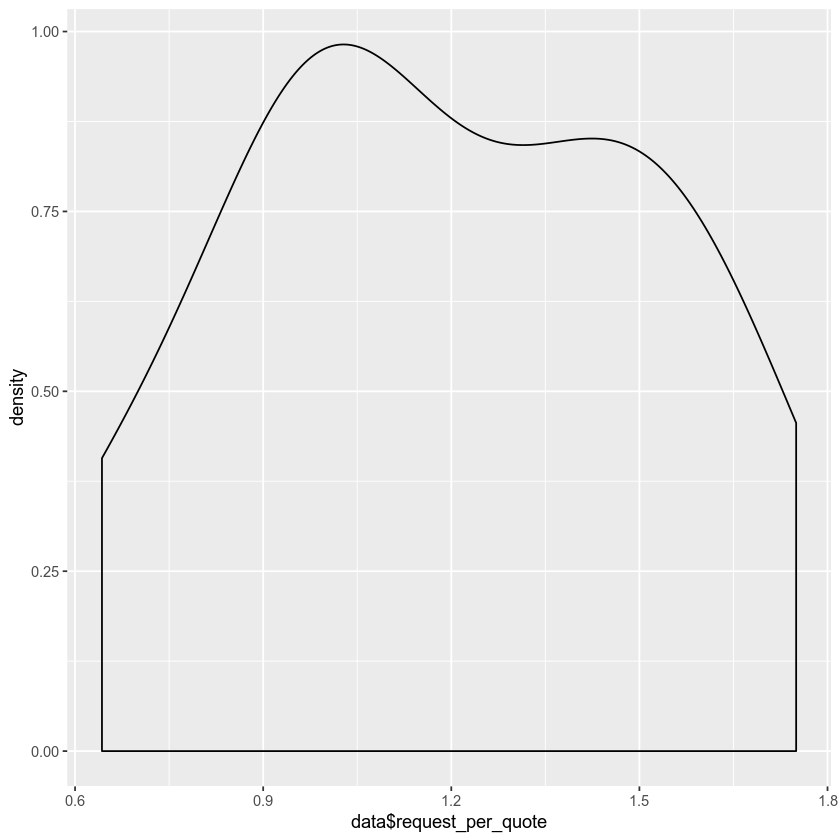

In [6]:
# A prima vista, la distribuzione non si discosta troppo dalla normale
data %>% ggplot(aes(data$request_per_quote)) + 
  geom_density()

Con il seguente codice calcolo le principali grandezze statistiche di una distribuzione (media e deviazione standard) per:
- numero richieste;
- numero preventivi;
- quote per request;
- request per quote;

In [7]:
stat <- data %>% 
  summarise(avg_quote = mean(num_qt),
            avg_rqst = mean(num_rqst),
            avg_qpr = mean(quote_per_request),
            avg_rpq = mean(request_per_quote),
            sd_quote = sd(num_qt),
            sd_rqst = sd(num_rqst),
            sd_qpr = sd(quote_per_request),
            sd_rpq = sd(request_per_quote))
stat

avg_quote,avg_rqst,avg_qpr,avg_rpq,sd_quote,sd_rqst,sd_qpr,sd_rpq
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
19.88235,22.05882,0.9084882,1.196429,7.175325,5.584248,0.2894338,0.3341797


Dalle medie si evince che abbiamo più richieste che preventivi in media. Ciò può significare che alcune richieste sono ancora in pending e devono essere prese in carico dal professionista di riferimento. La deviazione standard ci indica che abbiamo più variabilità nella distribuzione delle quote che in quella delle richieste. Ha senso perchè un professionista prima di utilizzare un pacchetto per il preventivo deve valutarne bene la convenienza e in base alle caratteristiche intrinseche del servizio è possibile che ci siano meno professionisti disposti a comprare/utilizzare i pacchetti.

Mi estraggo una lista con i valori della media e della deviazione standard per la variabile **request_per_quote**

In [8]:
values <- c(stat$avg_rpq, stat$sd_rpq)
keys <- c('media', 'deviazione_standard')
distribution <- setNames(as.list(values), keys)
distribution

$media
[1] 1.196429

$deviazione_standard
[1] 0.3341797

Oltre al grafico che abbiamo visto, anche i numeri potrebbero indicarci che si tratta di una distribuzione normale (media e deviazione standard non si discostano troppo, rispettivamente, dai valori di 0 e 1)

R ha il pregio di avere tante librerie utili ai fini statistici, una delle quali è **shapiro.test**.

Il test di Shapiro-Wilk viene considerato uno dei test più indicativi per quanto riguarda la normalità, specialmente per piccoli campioni, come accade in questo caso. L'ipotesi nulla dal quale parte questo test è che la distribuzione sia normale.


In [9]:
shapiro.test(data$request_per_quote)


	Shapiro-Wilk normality test

data:  data$request_per_quote
W = 0.95522, p-value = 0.5441


Il p-value decisamente maggiore di 0.05 (livello di significatività utilizzato per convenzione) ci porta a non essere in grado si smentire l’ipotesi nulla, dunque possiamo concludere che la distribuzione normale è appropriata per questo campione. Avrei potuto utilizzare anche la distribuzione gamma, perchè la variabile **request_per_quote** può assumere solo valori maggiori di zero.

Il fatto che la distribuzione sia normale ci porta a dire che i valori tendono a concentrarsi in un unico punto (il valore atteso, che è 1,19). Di conseguenza possiamo sostenere che per ogni servizio ci sono in media più richieste che preventivi. Basandoci su questo piccolo campione quindi si potrebbe sostenere che è necessario intervenire per fare in modo che a tutte le richieste ci sia un seguito (preventivo) in modo da non disincentivare il cliente all'utilizzo del portale ProntoPro a causa dei tempi di attesa. In un caso come questo la cosa migliore da fare è incentivare il libero professionista ad acquistare pacchetti e soprattutto a utilizzarli per colmare il gap tra il numero richieste e quello dei preventivi.

Un'ulteriore conferma della normalità della distribuzione la possiamo avere osservando i dati tramite il qq plot. Come possiamo vedere le osservazioni si trovano approssimativamente sulla retta e all'interno dell'area grigia (intervallo di confidenza)

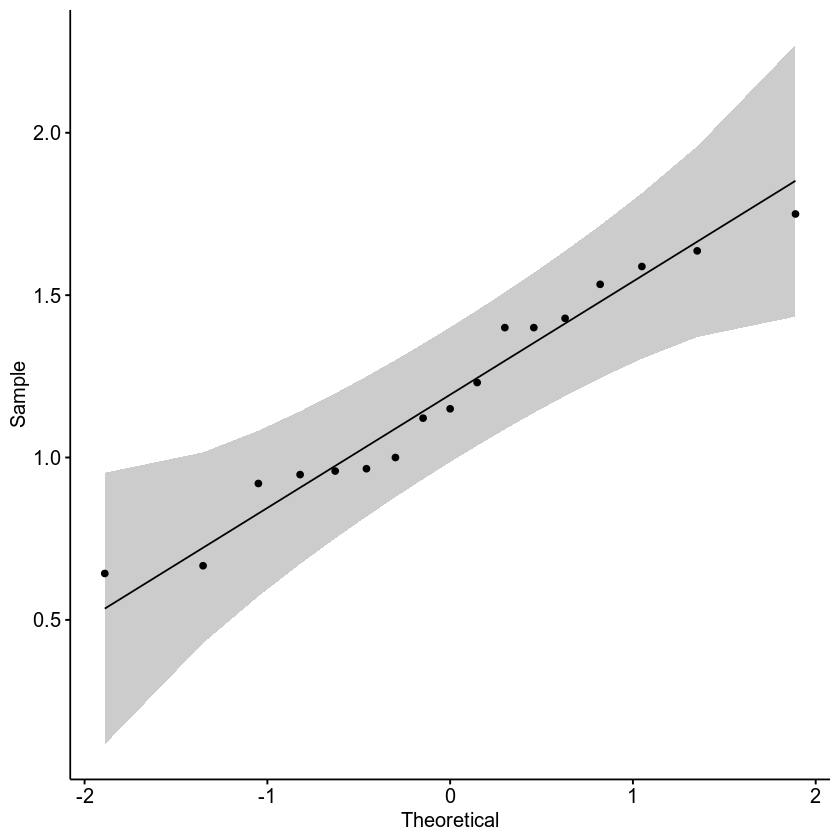

In [10]:
ggqqplot(data$request_per_quote)

Con il one-sample **t-test** possiamo verificare se siamo in grado concludere che il valore atteso della variabile **quote_per_request** è diverso da 1 (come indicato con il parametro mu).
In questo caso, basandoci sul sample a nostra disposizione, non possiamo concludere che la media sia diversa da 1. 
Questo potrebbe voler dire che, se consideriamo una popolazione che tende all'infinito, a ogni richiesta ci aspettiamo che un professionista faccia un preventivo (quote_per_request = 1).

In [11]:
t.test(data$quote_per_request, mu = 1)


	One Sample t-test

data:  data$quote_per_request
t = -1.3036, df = 16, p-value = 0.2108
alternative hypothesis: true mean is not equal to 1
95 percent confidence interval:
 0.7596751 1.0573014
sample estimates:
mean of x 
0.9084882 


Per avere una visione più chiara di quelle che sono le performance dei servizi ho ritenuto opportuno dividere gli stessi in due categorie:
- Casa;
- Benessere/Hobby;

Prima di tutto creo due vettori di stringhe. Ciascun vettore contiene tutti i servizi che appartengono alla categoria assegnatagli.

In [12]:
casa <- c("Antifurto e allarme",                      
          "Certificato conformità impianto elettrico",   
          "Certificazione energetica",                  
          "Decoratore pareti interne",                   
          "Elettricista",                                
          "Idraulico",                                   
          "Imbianchino",                                 
          "Manutenzione o revisione caldaia",            
          "Ristrutturazione bagno",                    
          "Ristrutturazione casa"
          )

benessere_hobby <- c("Catering e banqueting", 
                     "Consulente per l'alimentazione/Nutrizionista",
                     "Dog sitter",
                     "Fotografo per eventi",
                     "Lezioni di chitarra",                         
                     "Lezioni di inglese",
                     "Personal trainer"
                     )

Utilizzando la funzione **mutate** della libreria **dplyr** possiamo aggiungere una colonna al nostro dataset. All'interno della funzione mutate utilizzo la funzione **case_when** per assegnare i valori alla nuova colonna (categoria) basandomi sui valori della colonna servizio.

In [13]:
data <- data %>% mutate(categoria=case_when(
  servizio %in% casa ~ "Casa",
  servizio %in% benessere_hobby ~ "Benessere/Hobby"
))
data

servizio,num_pro,M,F,prov_si,prov_no,num_rqst,num_qt,quote_per_request,request_per_quote,categoria
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>
Antifurto e allarme,10,3,7,6,4,18,11,0.6111,1.6364,Casa
Catering e banqueting,31,9,22,15,16,37,33,0.8919,1.1212,Benessere/Hobby
Certificato conformità impianto elettrico,22,10,12,12,10,23,24,1.0435,0.9583,Casa
Certificazione energetica,19,4,15,8,11,16,13,0.8125,1.2308,Casa
Consulente per l'alimentazione/Nutrizionista,24,10,14,12,12,23,20,0.8696,1.1500,Benessere/Hobby
Decoratore pareti interne,14,8,6,8,6,18,18,1.0000,1.0000,Casa
Dog sitter,16,7,9,10,6,20,14,0.7000,1.4286,Benessere/Hobby
Elettricista,20,8,12,10,10,28,20,0.7143,1.4000,Casa
Fotografo per eventi,21,6,15,10,11,18,19,1.0556,0.9474,Benessere/Hobby


Adesso vediamo un pò di 'basic statistics', raggruppando per categoria.
In questo caso ho considerato la variabile **quote_per_request**. La variabile in questione rappresenta una fotografia che ci permette di rispondere alla domanda 'quante richieste si convertono in preventivi?'

Dai numeri che ho ricavato si evince che per i servizi per la casa la domanda di richieste trova un seguito maggiore in termini di preventivi, però abbiamo anche maggiore variabilità. Può essere dovuto dal fatto che ci sono attività che hanno più mercato rispetto ad altre all'interno della categoria casa. 
Vedendo questi numeri si potrebbe dire che le attività riguardanti i servizi per la casa sono quelle che attraggono di più i professionisti.
Ovviamente può succedere anche che per una richiesta ci sia più di un preventivo. Questo può essere potenzialmente dannoso perchè il professionista che utilizza un pacchetto per fare un preventivo e poi non ottiene l'incarico non sarà propenso a riutilizzare il servizio. 

In [14]:
stat2 <- data %>% 
  group_by(categoria) %>% 
  summarize(n = n(),
            avg_qpr = mean(quote_per_request),
            sd_qpr = sd(quote_per_request)
            )
stat2

categoria,n,avg_qpr,sd_qpr
<chr>,<int>,<dbl>,<dbl>
Benessere/Hobby,7,0.7792857,0.1668656
Casa,10,0.9989300,0.3290788


Con il seguente plot voglio rappresentare la differenza in **quote_per_request** tra le 2 categorie. L'icona a stella rappresenta la media delle due distribuzioni. Possiamo notare come per 6 servizi abbiamo più preventivi che richieste. Non ci sorprende che questo accada per i servizi della casa, visto che c'è sia più domanda ma soprattutto più offerta per quel tipo di servizi.

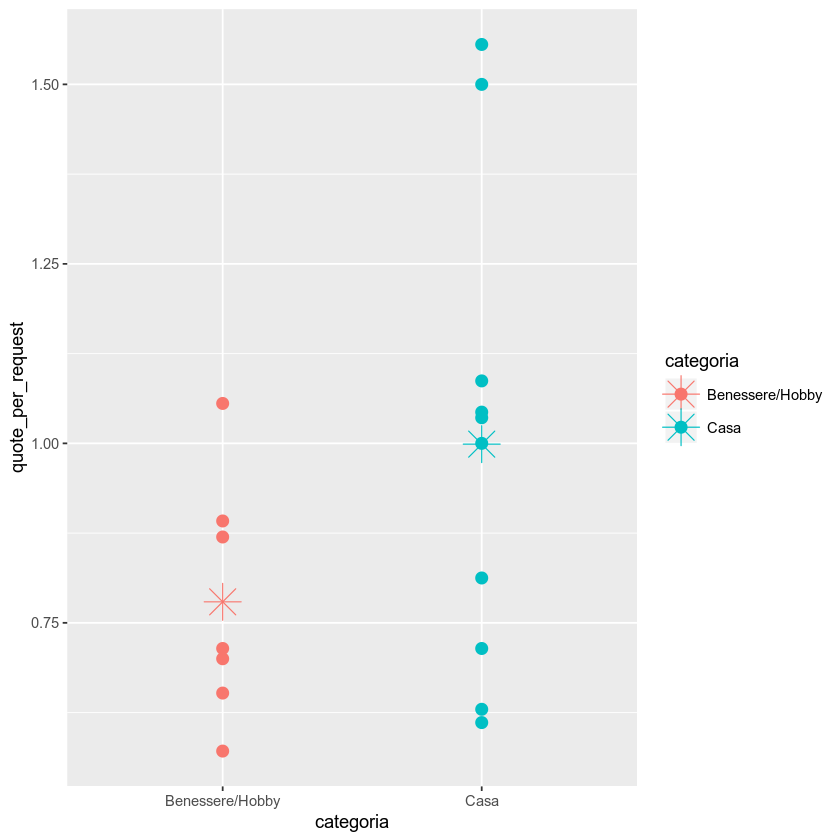

In [15]:
data %>% ggplot(aes(x = categoria, y = quote_per_request, color= categoria)) +
  geom_point(size = 3) +
  geom_point(data = stat2, aes(x = categoria, y = avg_qpr), size = 7, shape = 8)
  

Come già fatto in precedenza posso effettuare un t-test per verificare se la differenza tra le medie per le due categorie è statisticamente significativa. Prima mi ricavo i singoli intervalli di confidenza all'interno di ogni gruppo.

In [16]:
casa <- data  %>% filter(categoria == 'Casa')

Per la casa non possiamo arrivare alla conclusione che la variabile **quote_per_request** abbia un valore atteso diverso da 1. Come già spiegato in precedenza, in linea teorica rappresenta una situazione ideale.

In [17]:
t.test(casa$quote_per_request, mu = 1)


	One Sample t-test

data:  casa$quote_per_request
t = -0.010282, df = 9, p-value = 0.992
alternative hypothesis: true mean is not equal to 1
95 percent confidence interval:
 0.7635212 1.2343388
sample estimates:
mean of x 
  0.99893 


In [18]:
bh <- data  %>% filter(categoria == 'Benessere/Hobby')

E' interessante notare che per la categoria Benessere/Hobby possiamo prendere per buona l'ipotesi alternativa (la media non è uguale a 1 e in questo caso è minore)
Questo può voler dire che c'è da lavorare in termini di conversione da richieste a preventivi. Una soluzione potrebbe essere quella di offrire pacchetti speciali ai professionisti per la fruizione di servizi di benessere/hobby.

In [19]:
t.test(bh$quote_per_request, mu = 1)


	One Sample t-test

data:  bh$quote_per_request
t = -3.4996, df = 6, p-value = 0.01283
alternative hypothesis: true mean is not equal to 1
95 percent confidence interval:
 0.6249607 0.9336107
sample estimates:
mean of x 
0.7792857 


E infine verifico che la differenza tra le medie sia statisticamente significativa

In [20]:
t.test(data$quote_per_request ~ data$categoria, data)


	Welch Two Sample t-test

data:  data$quote_per_request by data$categoria
t = -1.805, df = 13.994, p-value = 0.09262
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.48064149  0.04135292
sample estimates:
mean in group Benessere/Hobby            mean in group Casa 
                    0.7792857                     0.9989300 


Il valore 0 si trova nell intervallo di confidenza e il p value è maggiore di .05. Dunque non siamo in grado di arrivare alla conclusione che la differenza tra le medie della variabile quote_per_request tra le categorie servizi è diversa da 0.

# CONCLUSIONI 

Dall'analisi che ho condotto si possono trarre alcuni spunti interessanti per il business:

- il valore atteso del numero di richieste per numero di preventivi tende a concentrarsi su un valore (1,19). Può voler dire che è necessario focalizzarsi sui pacchetti per incentivare i liberi professionisti a fare preventivi in modo da dare un riscontro a ogni cliente che manifesta interesse nell'utilizzo del portale ProntoPro;

- con il sample a disposizione non siamo in grado di concludere che il numero di preventivi per numero di richieste (quote_per_request) sia diverso da 1. In teoria significa che per ogni richiesta abbiamo un preventivo (andrebbe in contrasto con quello sostenuto nel punto precedente). In questo caso un'analisi più accurata, per esempio dividendo i servizi in categorie, sembra la cosa più appropriata da fare. 

- la categoria Casa è più performante in termini di conversione da richiesta a preventivo rispetto alla categoria Benessere/Hobby. Questo sicuramente è dovuto dal fatto che i servizi per la casa sono servizi in qualche modo più necessari e generano più senso di urgenza rispetto a quelli che riguardano il benessere e il tempo libero. 


## Grazie per l'attenzione

### Luca RIZZI